# 1. Prepare enviroment

## 1.1 Import some libraries

In [1]:
import re
import json
import time
import talos
import pygeoj
import geojson
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import pandas_profiling as pp
import matplotlib.pyplot as plt


from itertools import chain
from tensorflow import keras
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import silhouette_score
from eli5.sklearn import PermutationImportance
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Activation
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score

from talos.utils import lr_normalizer
from keras.models import Sequential
from keras.layers import Dropout, Dense, Activation
from keras.optimizers import Adam, Nadam, RMSprop, SGD
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor


%matplotlib inline
sns.set()

Using TensorFlow backend.


## 1.2 Download and import files to datasets

In [2]:
listings = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2019-09-23/data/listings.csv.gz')
print('\n')
print("listings:" + str(listings.shape))

# reviews =  pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2019-09-23/data/reviews.csv.gz')
# print("reviews:" + str(reviews.shape))

# calendar = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2019-09-23/data/calendar.csv.gz')
# print("calendar:" + str(calendar.shape))

# neighbourhoods1 = pygeoj.load('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2019-09-23/visualisations/neighbourhoods.geojson')
# This file isn't avaliable to download

# neighbourhoods2 = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2019-09-23/visualisations/neighbourhoods.csv')
# This file doesn't have relevant information




listings:(34329, 106)


#2. Exploratory data analysis

## 2.1 Header of the files and data avaliability


In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20190923212307,2019-09-24,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for Carni...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for Carni...,none,This is the best spot in Rio. Everything happe...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.13
1,25026,https://www.airbnb.com/rooms/25026,20190923212307,2019-09-24,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,f,f,strict_14_with_grace_period,t,t,3,3,0,0,2.06
2,31560,https://www.airbnb.com/rooms/31560,20190923212307,2019-09-24,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.36
3,35636,https://www.airbnb.com/rooms/35636,20190923212307,2019-09-24,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,"The location is extremely convenient, safe and...",This cosy apartment is just a few steps away ...,none,The apartment street is very quiet and safe ....,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,2.25
4,35764,https://www.airbnb.com/rooms/35764,20190923212307,2019-09-24,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,"FEEL LIKE YOUR HOME LIVING AS ""CARIOCA"" LOCAL ...",Our newly renovated studio is located in the b...,none,Our guests will experience living with a local...,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,2.83


In [4]:
for i in listings.columns:
  print(i)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_ni

** Listing Analysis **: Main dataset, has enough variables that can contribute with the model and a relevant volume os data to study. This dataset will be used.

In [6]:
# reviews.head()

**Review Analysis**: Dataset with establishment id and review date and text. This dataset has an interesting set of text information that can add the model, however, due to the possibility of containing different languages, it is necessary to apply many NLP libraries which would take more development time.

In [8]:
# calendar.head()

In [9]:
# calendar[calendar['listing_id'] == 17878]

** Calendar analysis **: Dataset with property vacancy data with relatively "future" dates to dataset listings. The data were already summarized in the "listings" dataset, so it is not necessary to use it.


## 2.2 Data visualization

In [10]:
## General report

# pp.ProfileReport(listings)

# 3. Data preparation

## 3.1 Variable cleanup

Before cleaning warnings, it is necessary to take advantage of the variables that can be calculated before their mother variables are eliminated.


In [12]:
## Change to binnary variables
to_binnary = ['neighborhood_overview','notes','transit','access','interaction', 'house_rules']

for i in to_binnary:
  listings['has_' + i] = (listings[i].isnull() * 1 - 1) ** 2


## Calculate date interval
today = pd.to_datetime(datetime.date.today())

listings['time_as_host'] = today - pd.to_datetime(listings['host_since'])
listings['time_as_host'] = pd.to_numeric(listings['time_as_host'].dt.days, downcast='integer')

listings['time_from_first_review'] = today - pd.to_datetime(listings['first_review'])
listings['time_from_first_review'] = pd.to_numeric(listings['time_from_first_review'].dt.days, downcast='integer')

listings['time_from_last_review'] = today - pd.to_datetime(listings['last_review'])
listings['time_from_last_review'] = pd.to_numeric(listings['time_from_last_review'].dt.days, downcast='integer')

## Group time for calendar update
listings['calendar_update_reduced'] = listings['calendar_updated'].str.replace(' ago','').str.replace('a ','').str.replace('\d','').str.replace(' ','')

## Calculate host_location_rj
listings['host_location_rj'] = listings['host_location'].str.contains('Rio de Janeiro') * 1

## Calculate list size
listings['host_verifications_count'] = listings['host_verifications'].str.split(',').str.len()
listings['amenities_count'] = listings['amenities'].str.split(',').str.len()


## Bathrooms adjustment
listings['bathrooms'] = listings['bathrooms'].astype(float).fillna(0).round()
listings['bathrooms'] = pd.np.where(listings['bathrooms'] > 3, 4, listings['bathrooms'])
listings['bathrooms'] = listings['bathrooms'].astype(str).str.replace('4','4+')


## Calculate if the review has a "high" score
review_score_list = [x for x in listings.columns if x.startswith('review_scores')]

for i in review_score_list:
  listings[i] = listings[i].astype(float).fillna(0)
  listings[i] = pd.np.where(listings[i] >= listings[i].quantile(0.75),1,0)


In [13]:
## Now its time to list the variables that will be removed

warnings_remove = [
                  'scrape_id', # has constant value 20190923212307
                  'name', # has a high cardinality: 33163 distinct values
                  'summary', # has 1884 / 5.5% missing values and has a high cardinality: 30949 distinct values
                  'space', # has 13212 / 38.5% missing values and has a high cardinality: 20125 distinct values
                  'description', # has 857 / 2.5% missing values and has a high cardinality: 32659 distinct values
                  'experiences_offered', # has constant value none
                  'neighborhood_overview', # has 15501 / 45.2% missing values, has a high cardinality: 17136 distinct values and will be changed to binnary variable
                  'notes', # has 23164 / 67.5% missing values, has a high cardinality: 9932 distinct values and will be changed to binnary variable
                  'transit', # has 15631 / 45.5% missing values, has a high cardinality: 17044 distinct values and will be changed to binnary variable
                  'access', # has 17848 / 52.0% missing values, has a high cardinality: 14411 distinct values and will be changed to binnary variable
                  'interaction', # has 17367 / 50.6% missing values, has a high cardinality: 14763 distinct values and will be changed to binnary variable
                  'house_rules',  # has 16633 / 48.5% missing values, has a high cardinality: 15724 distinct values and will be changed to binnary variable
                  'thumbnail_url', # has 34329 / 100.0% missing values 
                  'medium_url', # has 34329 / 100.0% missing values 
                  'picture_url', # has a high cardinality: 33891 distinct values 
                  'xl_picture_url', # has 34329 / 100.0% missing values 
                  'host_url', # has a high cardinality: 24429 distinct values 
                  'host_name', # has a high cardinality: 6290 distinct values 
                  'host_since', # has a high cardinality: 3085 distinct values and will be change to date interval
                  'host_location', # has a high cardinality: 1121 distinct values and will be changed to binnaries "host_location_rj" and "host_location_br"
                  'host_about', # has 17721 / 51.6% missing values, high cardinality: 9732 distinct values and will be changed to binnary variable
                  'host_acceptance_rate', # has 34329 / 100.0% missing values 
                  'host_thumbnail_url',  # has a high cardinality: 24291 distinct values 
                  'host_picture_url', # has a high cardinality: 24291 distinct values 
                  'host_neighbourhood', # has 12700 / 37.0% missing values  and has a high cardinality: 166 distinct values
                  'host_total_listings_count', # is highly correlated with host_listings_count (ρ = 1)
                  'host_verifications', # has a high cardinality: 336 distinct values and wil be calculated to "host_verifications_count"
                  'street', # has a high cardinality: 474 distinct values
                  'neighbourhood', # has 1906 / 5.6% missing values and has a high cardinality: 100 distinct values
                  'neighbourhood_cleansed', # has a high cardinality: 153 distinct values 
                  'neighbourhood_group_cleansed', # has 34329 / 100.0% missing values
                  'city', # has a high cardinality: 323 distinct values
                  'state', # has a high cardinality: 52 distinct values
                  'zipcode', # has 1772 / 5.2% missing values and has a high cardinality: 4233 distinct values
                  'smart_location', # has a high cardinality: 326 distinct values
                  'amenities', # has a high cardinality: 32076 distinct values
                  'square_feet', # has 33806 / 98.5% missing values 
                  'weekly_price', # has 31607 / 92.1% missing values and has a high cardinality: 756 distinct values
                  'monthly_price', # has 31336 / 91.3% missing values and has a high cardinality: 841 distinct values
                  'minimum_minimum_nights', # is highly correlated with minimum_nights (ρ = 0.96622)
                  'maximum_minimum_nights', # is highly correlated with minimum_minimum_nights (ρ = 0.96438)
                  'minimum_maximum_nights', # is highly correlated with maximum_nights (ρ = 1) 
                  'maximum_maximum_nights', # is highly correlated with minimum_maximum_nights (ρ = 1) 
                  'minimum_nights_avg_ntm', # is highly correlated with maximum_minimum_nights (ρ = 0.98056) 
                  'maximum_nights_avg_ntm', # is highly correlated with maximum_maximum_nights (ρ = 1) 
                  'calendar_updated', # has a high cardinality: 93 distinct values and will be grouped
                  'has_availability', # has constant value t 
                  'availability_60', # is highly correlated with availability_30 (ρ = 0.96697)
                  'availability_90', # is highly correlated with availability_60 (ρ = 0.98857)
                  'first_review', # has 16044 / 46.7% missing values, a high cardinality: 2317 distinct values and will be calculated with date intervals
                  'last_review', # has 16044 / 46.7% missing values, a high cardinality: 1423 distinct values and will be calculated with date intervals
                  'review_scores_rating', # has 16997 / 49.5% missing values 
                  'review_scores_accuracy', # has 17017 / 49.6% missing values 
                  'review_scores_cleanliness', # has 17013 / 49.6% missing values 
                  'review_scores_checkin', # has 17020 / 49.6% missing values 
                  'review_scores_communication', # has 17012 / 49.6% missing values 
                  'review_scores_location', # has 17015 / 49.6% missing values 
                  'review_scores_value', # has 17015 / 49.6% missing values 
                  'requires_license', # has constant value f
                  'license', # has 34327 / 100.0% missing values 
                  'jurisdiction_names', # has 34329 / 100.0% missing values 
                  'jurisdiction_names', # has constant value
                  'is_business_travel_ready', # has constant value f
                  'calculated_host_listings_count', # is highly correlated with host_total_listings_count (ρ = 0.95245)
                  'calculated_host_listings_count_entire_homes', # is highly correlated with calculated_host_listings_count (ρ = 0.99695)
                  'calculated_host_listings_count_shared_rooms', # has 33160 / 96.6% zeros
                  'country_code', # has 99.9% of same values
                  'country', # has 99.9% of same values
                  'bed_type', # has 98.2% of same values
                  'calendar_last_scraped', # date information with low variation
]

In [14]:
## Here there are some variables od id information, that won't be used in the model

id_variables = [
                'id',
                'listing_url',
                'last_scraped',
                'host_id'
                ]

In [15]:

## Remove both list of variables and create the main dataset

df = listings.drop(columns = warnings_remove)
df = df.drop(columns = id_variables)

df = df.fillna(0)
print(df.shape)

(34329, 46)


In [16]:
## Money treatment

money_vars = ['price','security_deposit','cleaning_fee','extra_people']
for i in money_vars:
  df[i] = df[i].str.replace('$','').str.replace(',','').astype(float)

## Binnary adjusment

bin_vars = ['host_is_superhost','host_has_profile_pic','host_identity_verified']
for i in bin_vars:
  df[i] = df[i].str.replace('0','f')

## Other adjusments

df['host_response_time'] = pd.np.where(df['host_response_time'] == '0', 'no response', df['host_response_time'])
df['host_response_time'] = pd.np.where(df['host_response_time'].isnull(), 'no response', df['host_response_time'])
df['host_response_time'] = df['host_response_time'].str.replace(' ','_')

df['host_response_rate'] = df['host_response_rate'].str.replace('%','').astype(float)/100

df['bathrooms'] = df['bathrooms'].str.replace('.0','')

df['cancellation_policy'] = pd.np.where(
    df['cancellation_policy'] == 'strict','super_strict',
    pd.np.where(df['cancellation_policy'] == 'super_strict_30','super_strict',
                pd.np.where(df['cancellation_policy'] == 'super_strict_60','super_strict', df['cancellation_policy']
                            )))
## Fill missing values

for i in df.columns:
  if df[i].dtypes == 'object':
    df[i] = df[i].fillna('f')
  else:
    df[i] = df[i].fillna(0)

In [17]:
## General report

# pp.ProfileReport(df)

In [18]:
## Last adjustments before preprocessing

df = df.drop(columns = 'time_from_last_review')

# 4. Preprocessing and feature selection

## 4.1 Preprocessing


### 4.1.1 Creating local cluster

One work option without using neighborhood or city is to group the graphic coordinates into clusters to form geo-positioning groups.

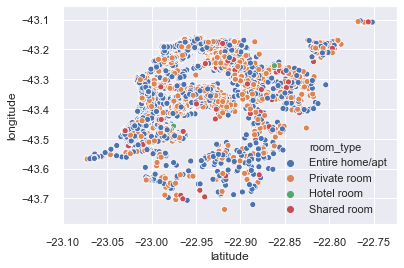

In [19]:
## Response map
sns.scatterplot(x = 'latitude', y = 'longitude', data = df, hue = 'room_type')


In [20]:
## Clustering data

x = df[['latitude','longitude']]

distortions = []
for i in range(2, 12):
    km = KMeans(
        n_clusters=i,
        init='random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=0)
    
    km.fit(x)
    y = km.fit_predict(x)

    silhouette = round(silhouette_score(x, km.labels_), 2)

    print("Clusters: " + str(i) + ", distortions: " + str(round(km.inertia_,2)) + " and silhouette: " + str(silhouette))

Clusters: 2, distortions: 91.67 and silhouette: 0.71
Clusters: 3, distortions: 63.51 and silhouette: 0.66
Clusters: 4, distortions: 47.21 and silhouette: 0.51
Clusters: 5, distortions: 37.9 and silhouette: 0.52
Clusters: 6, distortions: 30.61 and silhouette: 0.51
Clusters: 7, distortions: 27.06 and silhouette: 0.49
Clusters: 8, distortions: 23.38 and silhouette: 0.5
Clusters: 9, distortions: 20.42 and silhouette: 0.51
Clusters: 10, distortions: 17.73 and silhouette: 0.49
Clusters: 11, distortions: 14.39 and silhouette: 0.5


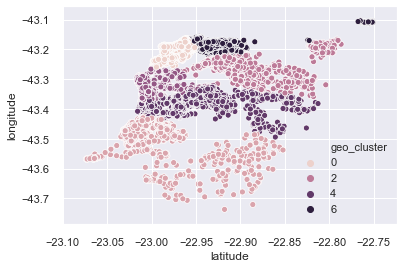

In [21]:
## Chosen: Clusters 6, last "great" dropout in distortions and silhouette near 0.5

km = KMeans(n_clusters = 6, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
km.fit(x)
df['geo_cluster'] = km.fit_predict(x)

## View the clusters
sns.scatterplot(x = 'latitude', y = 'longitude', data = df, hue = 'geo_cluster')

## Change to text
df['geo_cluster'] = df['geo_cluster'].astype(str)

### 4.1.2 Create dummies variables


In [22]:
## Remove geolocation variables, because they won't be needed

df = df.drop(columns = ['latitude','longitude'])

In [23]:
## Transform categorical vars into their respective dummies

dummies_vars = []
for i in df.columns:
  if df[i].dtypes == 'object' and i != 'room_type':
    dummies_vars.append(i)

df_model = pd.get_dummies(df, columns = dummies_vars)


## Transform response variable in category data

df_model['room_type'] = df_model['room_type'].astype('category')

In [24]:
## Standardize the name of the columns

variables = [re.sub('[^a-zA-Z0-9]','_',str(x.lower())) for x in list(df_model.columns)]
cleaned_names = []

for v in variables:  
  if v.endswith('_'):
    v = v[:-1]
  while "__" in v:
    v = v.replace('__','_')
  cleaned_names.append(v)

df_model.columns = cleaned_names

In [25]:
## After the variables names were cleaned, check if there are any duplicated

df_variables = pd.DataFrame(df_model.columns)
df_variables.columns = ['variables']
df_variables = pd.DataFrame(df_variables.groupby('variables')['variables'].count())
print(df_variables[df_variables['variables'] > 1])

del(df_variables)

                       variables
variables                       
market_rio_de_janeiro          2


In [26]:
## In this case, its necessary to combine the variable 'market_rio_de_janeiro'

market_rio_de_janeiro = df_model['market_rio_de_janeiro'].sum(axis = 1)

df_model = df_model.drop(columns = ['market_rio_de_janeiro'])

df_model['market_rio_de_janeiro'] = market_rio_de_janeiro

### 4.1.3 Remove outliers


In [27]:
## Remove outliers using outlier limits

for i in df_model.columns:
  if i != 'room_type' and len(df_model[i].drop_duplicates()) > 2:
    
    q1 = df_model[i].quantile(0.25)
    q3 = df_model[i].quantile(0.75)
    iq = q3 - q1    

    df_model[i] = pd.np.where(df_model[i] <= (q1 - iq * 1.5), q1, pd.np.where(df_model[i] >= (q3 + iq * 1.5), q3, df_model[i]))


## 4.2 Feature Selection

### 4.2.1 High correlated variables

In [28]:
## Create auto correlated matrix
corr = df_model.corr().abs()

## Select upper triangle
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

## Find variables with correlation above the cuthold (85%)
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

## Remove the response variable, if it were listed as to remove
if 'room_type' in to_drop:
  to_drop.remove('room_type')

# Remove variables from the data to model
df_model = df_model.drop(columns = to_drop)

print(str(len(to_drop)) + ' variables removed.')
print('\n')
to_drop

8 variables removed.




['host_response_time_f',
 'host_is_superhost_t',
 'host_has_profile_pic_t',
 'host_identity_verified_t',
 'is_location_exact_t',
 'instant_bookable_t',
 'require_guest_profile_picture_t',
 'require_guest_phone_verification_t']

### 4.2.2 Principal Component Analysis

In [29]:
## Control of variables removed
current_variables = list(df_model.columns )
current_variables.remove('room_type')

## Scale data to run PCA analysis
scaler = StandardScaler()
scaler.fit(df_model[current_variables])
df_model_scaled = scaler.transform(df_model[current_variables])

## Create analysis to keep 80% of the variance in the dataset
pca = PCA(0.80)
principal_components = pca.fit_transform(df_model_scaled)

## Select the components that have variance above the mean
n_comp = len(pca.explained_variance_[pca.explained_variance_ >= np.mean(pca.explained_variance_)])

## Inside the main components, check witch variables show higher explicability (above the absolute mean)
most_imp_features = []

for i in range(1,n_comp):
  validation = abs(pca.components_[i]) >= abs(pca.components_[i]).mean()
  most_imp_features.append(list(df_model.drop(columns = 'room_type').columns[validation]))
 
most_imp_features = list(dict.fromkeys(list(chain(*most_imp_features))))

## Include response, in cas it has beem removed
if 'room_type' not in most_imp_features:
  most_imp_features.append('room_type')

## Keep only the most important features
df_model = df_model[most_imp_features]

## Show removed variables
print(str(len(current_variables) - len(df_model.columns)) + ' variables removed due to low variance')
for i in current_variables:
  if i not in most_imp_features:
    print(i)

30 variables removed due to low variance
market_brasilia
market_buzios
market_manchester
market_perth
market_rome
market_salvador
property_type_barn
property_type_boat
property_type_bungalow
property_type_cabin
property_type_camper_rv
property_type_campsite
property_type_castle
property_type_chalet
property_type_cottage
property_type_dome_house
property_type_dorm
property_type_earth_house
property_type_farm_stay
property_type_guest_suite
property_type_guesthouse
property_type_hut
property_type_igloo
property_type_island
property_type_nature_lodge
property_type_other
property_type_tiny_house
property_type_tipi
property_type_townhouse
property_type_treehouse
property_type_vacation_home


# 5. Modeling

In [30]:
sample_type = [1,2] ## 1 = Undersampling and 2 = oversampling

## During the experiment, the strategy of oversampling took 50x more time to compute, due to the data size.
## This type of balancing will be disregarded due to the delivery date.
sample_type = [1]


for i in sample_type:
  
  ## Randomize the data
  df_model = df_model.sample(frac = 1, random_state = 4)


  ## X (predictors) and Y (response) variables definition
  y_var = 'room_type'
  x_vars = list(df_model.drop(columns = y_var).columns)
  x, y = df_model[x_vars], df_model[y_var]

  
  if i == 1:
    ## Balance the data using undersampling
    rus = RandomUnderSampler(random_state=0)
    x, y = rus.fit_resample(x, y)
  else:
    ## Balance the data using oversampling
    x, y =  SMOTE().fit_resample(x, y)
  

  ## Train and test split
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)


  ## Scaling data
  ## This need to be done to train and test dataset in different process, to simulate a "new scale" in data

  train_scaler = StandardScaler()
  test_scaler = StandardScaler()

  train_scaler.fit(x_train)
  test_scaler.fit(x_test)

  x_train = train_scaler.transform(x_train)
  x_test = test_scaler.transform(x_test)


  ## Multi class responses needs to be categorized to run properly in neural network models
  y_train = pd.DataFrame(y_train)
  y_train.columns = ['room_type']
  y_train = to_categorical(pd.factorize(y_train['room_type'], sort=True)[0] + 1)

  y_test = pd.DataFrame(y_test)
  y_test.columns = ['room_type']
  y_test = to_categorical(pd.factorize(y_test['room_type'], sort=True)[0] + 1)


  ## Deep learning model
  deep_learn = True

  model_time = time.clock()

  ## Hyperparameters dictionary

  param_dict = {
      
      'lr':(0.5, 5, 10),
      'first_neuron': [2**i for i in range(1,6)],
      'hidden_neuron': [2**i for i in range(1,6)],
      'hidden_layers':(0, 1, 2),
      'batch_size':(5,50,500),
      'epochs':[50, 100, 150],
      'dropout':(0.2, 0.5, 0.7),
      'weight_regulizer':[None],
      'emb_out_dims':[None],
      'optimizer':[Adam, RMSprop, SGD],
      'losses':['categorical_crossentropy'],
      'activation':['relu', 'softmax', 'tanh'],
      'kernel_initializer': ['normal','uniform'],
      'last_activation':['softmax']
      
  }

  ## Model function

  def neural_net(x_train, y_train, x_val, y_val, params):
      
      model = Sequential()
      
      ## First layer
      model.add(Dense(
          params['first_neuron'], 
          input_dim = x_train.shape[1], 
          activation = params['activation'], 
          kernel_initializer = params['kernel_initializer']))
      
      model.add(Dropout(params['dropout']))
      
      ## Hidden layers
      for i in range(params['hidden_layers']):
          model.add(Dense(params['hidden_neuron'], activation = params['activation'],
                          kernel_initializer = params['kernel_initializer']))
          model.add(Dropout(params['dropout']))
      
      ## Last layer
      model.add(Dense(y_train.shape[1], activation = params['last_activation'], kernel_initializer = params['kernel_initializer']))
      
      model.compile(
          loss = params['losses'], 
          optimizer= params['optimizer'](lr = lr_normalizer(params['lr'], params['optimizer'])), 
          metrics = ['acc'])
      
      history = model.fit(x_train, y_train,
                        validation_data = [x_test, y_test],
                        batch_size = params['batch_size'],
                        epochs = params['epochs'],
                        verbose = 0)
      
      return history, model


  ## Scan experiment

  if deep_learn:
      scanner_object = talos.Scan(x = x_train, y = y_train, x_val = x_test, y_val = y_test,
                                  model = neural_net, fraction_limit = 0.01, params = param_dict, experiment_name = 'neural_net_results', val_split = 0.3)


  print(str(datetime.timedelta(seconds=time.clock() - model_time)))

100%|███████████████████████████████████| 6075/6075 [19:25:13<00:00, 11.51s/it]


19:25:16.031547


In [31]:
## Turn back categorical data to a single column
y_test2 = pd.DataFrame(y_test).idxmax(axis = 1)

## Evaluate the experiment to find out best f-score
scanner_object.evaluate_models(x_val = x_test, y_val = y_test2, n_models = 10, metric = 'val_acc', folds = 5, shuffle = True, task = 'multi_class', asc = False)

print('\n')
scanner_object.data.head()


  0%|                                                   | 0/10 [00:00<?, ?it/s]

[4 4 2 1 1 2 3 3 4 3 2 4 4 4 4 1 1 4 4 4 1 3 4 1 1 1 3 1 2 4 4 3 2 2 3 2 2
 2 4 2 1 4 1 3 3 2 4 1 3 2 2 4 1 2 4 2 2 4 2 4 3 3 4 4 4 1 2 3 2 1 2 3 4 1
 2 4 1 1 3 4 4 1 2 1 1 4 1 2 1 2 4 4 3 4 4 2 3]
131    3
226    4
401    2
438    1
117    1
      ..
227    3
127    4
193    4
93     2
439    3
Length: 97, dtype: int64
[4 2 2 4 4 4 3 2 1 4 1 3 4 4 2 3 3 2 2 3 4 1 3 3 4 4 4 3 4 3 1 1 2 2 2 1 1
 1 2 1 4 1 2 4 4 2 4 1 4 1 1 1 2 1 1 3 4 4 1 1 1 3 3 3 1 3 1 4 2 1 3 1 3 3
 2 2 2 1 2 3 3 2 4 2 3 4 2 2 2 3 4 3 1 1 3 4 2]
339    1
101    2
128    2
481    4
440    4
      ..
417    1
138    1
264    3
302    1
363    2
Length: 97, dtype: int64
[4 1 1 2 4 2 4 4 1 4 3 3 1 4 3 2 1 4 1 1 2 1 3 4 1 2 1 2 1 1 2 1 3 1 1 4 4
 2 2 4 1 4 4 2 4 4 2 2 4 1 1 1 3 4 1 2 3 4 2 3 4 4 1 2 4 3 3 2 4 3 2 4 1 1
 4 2 4 3 1 2 2 2 1 2 2 2 2 3 2 1 3 1 4 3 1 2 2]
175    4
359    1
143    1
231    2
296    1
      ..
61     4
333    3
23     1
155    2
277    2
Length: 97, dtype: int64
[3 4 3 1 3 2 4 4 3 1 1 4 2 3 4 2 3

 10%|████▎                                      | 1/10 [00:34<05:11, 34.57s/it]

[1 1 4 1 2 2 2 2 1 1 4 3 4 3 2 1 1 4 3 4 4 3 2 1 2 1 3 1 2 1 4 3 1 1 3 4 3
 4 1 2 4 1 4 4 1 2 2 3 2 2 4 4 4 2 4 4 1 4 3 2 4 2 2 2 4 2 1 3 4 3 4 2 1 2
 1 4 2 2 1 3 4 1 2 2 4 2 3 3 3 3 3 1 4 3 1 4 1]
199    1
359    1
297    4
95     1
397    2
      ..
285    4
210    3
429    1
175    4
365    1
Length: 97, dtype: int64
[1 4 3 4 2 4 4 3 2 3 2 2 3 4 4 3 4 2 4 1 1 2 4 3 2 4 4 4 2 1 3 4 2 2 4 2 3
 2 1 2 1 1 4 4 3 2 4 3 1 3 1 1 4 4 3 4 3 3 2 2 3 2 4 4 2 4 1 1 4 3 3 3 3 2
 1 3 4 4 4 2 3 2 4 3 1 2 2 2 2 4 2 4 1 3 4 3 1]
402    1
466    4
104    3
357    4
33     2
      ..
341    1
127    4
236    4
11     3
451    1
Length: 97, dtype: int64
[2 4 2 2 3 4 1 3 1 2 3 1 2 1 4 2 4 3 4 2 1 3 3 2 1 3 2 1 4 2 3 3 4 3 1 3 1
 1 3 1 1 1 3 2 3 2 2 4 4 3 3 4 4 1 4 3 3 3 4 4 3 4 2 4 2 3 3 3 2 2 4 4 2 2
 3 3 1 2 1 4 3 2 4 2 3 1 1 2 1 1 3 4 4 1 4 2 2]
97     2
111    4
161    2
181    2
196    3
      ..
254    4
416    4
244    4
313    2
279    2
Length: 97, dtype: int64
[2 1 4 2 4 4 1 2 3 2 2 1 4 1 3 4 3

 20%|████████▌                                  | 2/10 [00:34<03:14, 24.32s/it]

[3 4 2 2 1 2 3 3 1 1 3 3 3 1 4 4 3 3 3 2 3 3 3 2 2 4 4 4 4 3 1 4 1 2 3 1 1
 1 3 1 3 3 1 1 3 2 4 3 2 2 2 2 3 4 2 2 1 1 4 1 1 2 3 1 2 2 4 3 2 3 1 2 4 2
 3 4 4 3 1 4 3 3 4 2 4 3 2 2 1 2 3 1 3 2 1 4 4]
280    2
421    4
301    2
446    2
429    1
      ..
31     3
238    2
284    1
216    1
366    4
Length: 97, dtype: int64
[2 1 4 1 2 4 1 4 4 4 1 4 2 4 4 1 3 1 2 4 4 1 4 1 3 2 2 2 3 2 3 1 2 2 3 4 1
 4 2 1 2 2 1 4 1 3 3 4 2 1 3 4 3 4 4 4 3 1 4 1 2 4 2 3 4 4 4 4 4 4 4 1 2 3
 4 4 1 4 2 3 3 4 1 4 2 2 2 2 2 3 1 1 2 2 2 2 2]
125    2
153    1
464    4
218    1
155    2
      ..
482    2
279    2
185    2
246    2
183    2
Length: 97, dtype: int64
[3 3 4 2 3 2 4 3 4 1 1 1 3 4 2 4 2 4 4 1 2 1 4 1 1 2 3 2 3 3 1 1 4 2 4 1 2
 1 2 1 2 2 4 4 4 3 3 1 4 3 4 4 1 4 2 2 1 3 4 4 3 1 2 1 2 1 2 4 4 2 4 1 3 4
 4 4 2 4 3 3 1 1 3 1 4 4 4 2 3 3 4 1 4 2 4 2 1]
210    3
237    3
30     4
479    2
172    3
      ..
86     3
204    2
484    4
128    2
403    1
Length: 97, dtype: int64
[3 4 2 2 2 3 3 1 3 2 2 1 2 4 2 3 1

 30%|████████████▉                              | 3/10 [00:35<02:00, 17.17s/it]

[3 2 2 2 1 4 4 1 3 3 1 3 3 4 2 1 3 4 3 1 3 2 4 1 3 4 3 2 2 4 3 1 4 4 3 2 3
 4 4 4 3 3 4 1 2 4 1 1 4 1 1 4 2 4 4 2 1 2 3 4 2 3 4 1 3 3 2 1 2 2 2 2 2 1
 2 3 1 4 3 2 1 2 1 3 1 2 3 2 1 4 3 4 4 4 2 4 1]
147    3
142    2
188    2
97     2
91     1
      ..
415    4
40     1
277    2
434    4
432    4
Length: 97, dtype: int64
[2 4 3 2 2 2 2 4 3 3 1 2 3 2 3 2 2 2 3 4 1 1 2 1 2 2 2 2 4 4 1 2 3 2 3 3 2
 1 3 1 4 4 1 1 3 2 4 4 3 1 3 1 2 1 1 1 4 3 3 1 1 4 1 4 4 1 4 2 3 2 4 1 4 2
 4 3 3 3 1 2 3 2 1 3 4 1 1 1 3 3 2 4 1 1 2 2 2]
241    2
92     4
329    3
63     2
35     2
      ..
351    1
65     1
298    2
368    2
58     2
Length: 97, dtype: int64
[4 1 3 2 1 2 2 4 3 3 4 1 1 2 1 3 2 3 4 2 3 2 4 3 1 4 4 1 3 3 1 2 2 2 4 2 1
 3 4 3 2 2 3 4 2 4 3 2 4 3 2 4 3 1 3 4 1 3 1 2 3 1 2 4 1 4 4 2 4 2 1 4 2 1
 1 4 2 3 4 2 2 1 3 3 4 4 4 4 2 2 1 1 3 3 1 2 3]
229    2
95     1
291    3
436    2
396    1
      ..
46     3
456    3
44     1
231    2
360    3
Length: 97, dtype: int64
[2 2 1 1 4 1 1 2 1 4 3 1 2 2 1 4 3

 40%|█████████████████▏                         | 4/10 [00:37<01:15, 12.51s/it]

[3 3 3 1 2 4 3 1 2 3 1 1 1 3 3 3 3 4 4 2 4 2 2 2 2 3 3 3 1 2 3 2 3 4 2 1 4
 1 2 2 4 1 3 3 4 3 1 2 1 3 1 4 4 3 3 3 4 4 1 2 4 1 1 2 2 1 1 2 1 2 3 3 4 1
 3 1 2 4 2 4 3 1 2 4 1 1 2 1 4 2 1 1 2 4 4 2 3]
194    3
37     3
380    3
20     1
487    2
      ..
181    2
163    3
364    4
455    2
287    3
Length: 97, dtype: int64
[4 4 2 3 4 1 3 2 3 4 4 2 1 2 2 4 2 2 3 2 4 1 2 1 3 3 1 2 3 2 2 4 4 1 3 3 2
 4 4 2 1 3 3 3 4 4 4 3 4 2 2 4 2 3 2 1 3 4 2 1 1 2 1 1 3 3 4 3 2 1 1 4 1 3
 1 3 2 3 1 2 1 2 3 3 4 1 4 1 4 2 4 3 3 4 2 4 2]
70     4
79     4
290    2
452    3
0      4
      ..
133    3
135    4
368    2
339    1
246    2
Length: 97, dtype: int64
[1 1 4 1 1 3 4 2 4 4 4 4 2 2 4 2 1 1 1 2 1 3 2 3 1 4 4 4 2 3 2 4 3 4 1 4 4
 3 2 1 2 3 4 1 2 4 1 3 1 4 1 1 3 4 3 1 4 1 4 2 2 2 1 3 4 1 3 2 4 3 2 2 1 4
 4 4 3 2 1 2 1 3 3 4 1 2 1 4 4 3 4 1 2 4 4 1 1]
413    4
416    4
458    4
71     1
106    1
      ..
260    2
40     1
137    2
191    1
311    1
Length: 97, dtype: int64
[2 1 4 2 4 1 3 2 2 2 2 1 2 4 4 2 4

 50%|█████████████████████▌                     | 5/10 [00:37<00:44,  8.91s/it]

[3 1 2 1 3 1 4 3 3 1 4 1 4 1 2 4 2 1 2 3 2 3 2 2 4 1 1 3 1 4 3 4 4 4 4 3 1
 1 4 2 1 3 3 3 2 2 4 2 2 4 2 2 2 2 2 3 3 2 2 1 1 3 4 4 2 2 2 3 3 1 1 4 3 3
 4 2 3 2 2 3 4 1 2 1 4 1 3 3 4 3 1 4 2 4 4 2 2]
370    3
435    1
241    2
23     1
123    3
      ..
280    2
440    4
92     4
459    2
34     2
Length: 97, dtype: int64
[4 3 2 3 3 3 2 3 4 2 4 1 2 2 4 4 3 2 4 3 3 1 2 2 4 4 4 2 4 2 2 4 2 2 4 1 3
 2 4 3 1 1 2 2 1 3 2 2 2 4 1 2 2 2 3 3 3 3 3 2 1 2 2 2 3 3 1 1 1 2 4 1 2 2
 3 3 4 3 1 4 1 2 3 3 4 2 1 2 2 2 2 3 3 1 4 3 2]
111    4
212    3
211    2
410    3
276    3
      ..
121    3
222    1
144    4
213    3
204    2
Length: 97, dtype: int64
[4 3 4 1 1 3 1 3 4 4 4 3 4 1 1 4 2 3 1 1 3 3 1 1 3 3 4 2 4 4 3 4 1 4 2 1 2
 1 4 1 4 2 1 1 2 1 3 4 1 1 2 2 4 2 1 2 4 2 4 2 1 3 3 1 2 1 1 1 4 4 3 3 3 3
 3 1 4 3 2 4 2 4 4 4 2 4 4 2 4 4 1 2 3 4 3 2 2]
346    4
443    4
481    4
467    1
342    1
      ..
54     3
176    4
163    3
59     2
185    2
Length: 97, dtype: int64
[4 1 3 3 4 3 3 4 1 1 4 4 1 3 2 4 1

 60%|█████████████████████████▊                 | 6/10 [00:37<00:25,  6.33s/it]

[2 1 1 1 2 3 4 2 1 2 2 3 1 1 1 2 2 2 4 1 2 4 2 4 3 1 1 2 4 2 1 1 3 3 3 4 2
 4 1 4 2 2 4 1 2 4 1 4 3 2 3 3 3 2 3 2 3 3 1 2 2 4 1 4 4 1 3 4 2 4 2 1 4 4
 4 3 1 1 4 1 4 3 4 2 2 1 2 3 2 2 2 4 3 2 2 2 2]
188    2
184    1
325    1
7      1
246    2
      ..
111    4
258    2
433    2
372    2
430    2
Length: 97, dtype: int64
[1 3 1 1 3 3 4 3 1 2 3 4 3 2 3 2 2 2 2 4 4 1 2 3 3 2 4 1 2 4 3 1 4 1 1 1 3
 1 3 3 4 2 3 2 4 3 1 4 3 1 3 3 3 1 1 1 4 3 4 2 1 4 3 2 4 2 1 3 3 3 1 2 1 2
 4 3 3 4 2 1 2 3 2 1 2 2 2 1 2 3 4 4 1 2 3 1 4]
403    1
369    3
252    1
14     4
329    3
      ..
248    1
88     2
370    3
13     1
450    4
Length: 97, dtype: int64
[3 2 3 3 1 4 3 3 3 4 2 2 2 2 3 1 3 3 4 2 3 2 4 2 4 4 2 3 3 4 1 2 1 1 4 3 4
 4 3 1 4 2 3 3 2 1 4 2 2 2 1 3 4 1 3 1 4 1 2 4 1 1 3 4 4 2 1 2 4 4 4 4 1 3
 3 2 3 3 4 2 1 4 2 4 3 3 2 2 3 4 2 3 4 4 1 1 1]
250    3
331    2
243    3
10     3
23     1
      ..
226    4
416    4
222    1
138    1
148    1
Length: 97, dtype: int64
[2 2 3 4 2 1 2 2 3 3 4 4 2 1 1 3 4

 70%|██████████████████████████████             | 7/10 [00:38<00:13,  4.54s/it]

[2 3 2 1 2 1 1 1 1 1 1 4 2 3 2 4 2 1 4 3 2 3 3 2 4 2 3 1 1 1 4 2 1 2 4 4 3
 3 2 4 3 4 2 3 2 1 2 3 4 4 2 2 4 4 2 4 4 3 3 2 1 1 3 4 1 3 2 1 1 2 3 4 3 4
 4 1 2 1 2 3 3 1 2 4 2 4 3 2 4 3 2 1 1 3 1 2 4]
418    2
405    3
214    2
230    2
224    2
      ..
334    1
54     3
98     4
183    2
113    4
Length: 97, dtype: int64
[1 3 2 2 1 1 1 3 3 3 2 4 3 1 4 4 2 1 1 1 1 2 1 4 4 3 3 4 4 2 4 3 2 1 1 1 3
 2 2 4 3 4 3 4 2 3 1 3 3 1 4 3 2 4 2 1 2 1 2 3 1 4 4 1 1 3 2 4 4 3 4 2 1 4
 3 4 3 1 1 4 2 1 2 1 4 2 2 2 1 3 1 4 3 2 3 1 2]
284    1
201    3
185    2
368    2
381    1
      ..
411    3
77     2
179    3
184    1
211    2
Length: 97, dtype: int64
[4 2 1 4 4 3 4 3 2 1 3 1 3 4 3 3 1 2 3 1 2 3 2 3 4 4 2 1 3 4 2 2 1 1 3 4 3
 1 4 4 1 3 4 3 3 1 1 1 2 4 2 2 4 4 1 1 4 1 4 2 4 4 2 2 2 2 3 2 4 4 2 1 3 2
 1 4 1 3 4 4 4 1 1 3 4 1 2 1 3 4 3 2 4 2 4 3 3]
69     3
355    2
252    1
186    4
442    1
      ..
251    4
197    2
415    4
271    4
332    3
Length: 97, dtype: int64
[3 2 3 2 1 4 2 4 3 1 4 2 1 3 2 1 2

 80%|██████████████████████████████████▍        | 8/10 [00:38<00:06,  3.27s/it]

[3 4 2 1 2 2 2 2 4 1 4 2 2 1 1 4 2 2 4 2 2 1 1 3 1 1 1 2 3 1 2 4 4 3 2 2 1
 2 4 4 2 1 4 3 3 2 3 2 3 3 4 4 4 4 4 4 4 2 3 1 3 3 4 2 1 1 4 3 3 2 3 2 4 4
 3 3 4 1 1 3 3 2 4 2 4 1 2 1 3 1 2 2 4 1 4 4 2]
360    3
167    4
103    2
109    1
313    2
      ..
263    4
71     1
119    4
450    4
204    2
Length: 97, dtype: int64
[4 2 2 1 1 4 4 3 2 2 4 4 1 4 2 2 1 3 4 4 3 1 1 4 3 3 4 2 4 3 3 1 2 1 1 3 3
 3 2 3 3 1 4 2 3 1 3 3 4 2 3 1 4 2 4 1 4 4 2 2 1 3 1 3 1 4 1 4 3 2 2 4 2 2
 1 4 4 3 4 3 3 1 2 1 4 4 3 3 3 2 3 1 2 1 3 2 4]
207    4
114    2
231    2
270    1
143    1
      ..
234    2
165    3
210    3
215    2
471    4
Length: 97, dtype: int64
[1 3 3 3 1 2 4 1 2 1 3 2 1 4 2 3 2 4 4 3 3 1 2 3 3 4 3 1 2 1 3 4 1 3 1 3 3
 1 4 1 3 3 4 2 1 1 2 3 1 2 4 2 2 3 4 4 3 2 4 3 1 1 2 3 4 1 1 2 4 3 1 2 1 4
 3 4 3 4 3 2 4 4 3 2 2 3 1 3 1 1 2 3 1 3 1 1 2]
166    1
262    3
41     3
189    3
222    1
      ..
327    1
452    3
191    1
66     1
395    2
Length: 97, dtype: int64
[4 3 4 4 4 2 4 2 2 3 4 2 2 3 3 2 2

 90%|██████████████████████████████████████▋    | 9/10 [00:38<00:02,  2.37s/it]

[2 4 4 1 4 4 4 4 2 4 1 3 4 2 2 4 2 1 2 4 4 4 4 3 4 4 2 4 1 4 3 3 3 2 3 2 2
 4 1 2 3 2 3 4 4 1 4 4 1 4 3 2 4 1 2 3 2 3 2 3 3 2 1 3 2 2 4 4 2 3 1 1 3 2
 2 1 3 3 1 1 3 2 4 4 2 2 3 3 3 4 4 1 4 3 2 1 4]
430    2
86     3
339    1
409    1
297    4
      ..
444    2
228    3
155    2
467    1
242    4
Length: 97, dtype: int64
[2 3 4 2 3 3 4 1 4 4 2 4 1 2 3 1 2 4 4 4 2 1 4 4 4 3 3 3 4 1 2 1 4 2 3 3 2
 4 2 4 2 3 3 3 4 4 4 4 3 4 3 2 1 2 4 3 2 3 4 2 1 2 3 1 2 4 4 4 1 4 3 3 3 1
 2 2 1 3 3 3 2 3 3 4 1 2 2 3 4 2 2 2 1 1 2 3 4]
132    2
37     3
346    4
378    2
373    3
      ..
402    1
174    1
105    2
336    3
69     3
Length: 97, dtype: int64
[1 4 3 2 3 4 1 1 1 2 4 2 1 1 2 2 4 4 3 4 3 4 2 2 1 1 4 3 4 1 1 4 4 1 1 4 2
 1 3 1 1 2 4 4 4 2 2 3 2 1 1 1 3 3 3 1 2 1 3 4 4 3 1 4 2 1 2 4 3 1 3 2 2 1
 3 4 2 1 1 1 1 2 3 3 4 2 2 4 4 2 4 1 2 4 1 1 4]
199    1
76     4
28     3
34     2
390    3
      ..
419    2
458    4
248    1
106    1
469    4
Length: 97, dtype: int64
[1 2 1 3 1 2 3 4 4 2 1 3 3 3 3 1 4

100%|██████████████████████████████████████████| 10/10 [00:39<00:00,  3.92s/it]


>> Added evaluation score columns to scan_object.data




,round_epochs,val_loss,val_acc,loss,acc,activation,batch_size,dropout,emb_out_dims,epochs,...,hidden_layers,hidden_neuron,kernel_initializer,last_activation,losses,lr,optimizer,weight_regulizer,eval_f1score_mean,eval_f1score_std
0,100,0.803612,0.829918,0.130018,0.955466,softmax,16,0.2,None,100,...,0,2,uniform,softmax,categorical_crossentropy,4.10,<class 'keras.optimizers.Adam'>,None,NaN,NaN
1,50,0.403781,0.862705,0.336724,0.884615,relu,24,0.2,None,50,...,0,8,normal,softmax,categorical_crossentropy,0.95,<class 'keras.optimizers.SGD'>,None,NaN,NaN
2,50,0.517040,0.836066,0.440134,0.850202,relu,18,0.2,None,50,...,0,4,normal,softmax,categorical_crossentropy,2.30,<class 'keras.optimizers.RMSprop'>,None,NaN,NaN
3,100,0.677876,0.731557,0.646272,0.710526,tanh,8,0.2,None,100,...,0,2,normal,softmax,categorical_crossentropy,0.95,<class 'keras.optimizers.RMSprop'>,None,NaN,NaN
4,100,0.609870,0.815574,0.430208,0.809717,relu,15,0.2,None,100,...,0,32,normal,softmax,categorical_crossentropy,2.75,<class 'keras.optimizers.Adam'>,None,NaN,NaN


In [48]:
metrics = ['acc', 'val_loss', 'val_acc', 'eval_f1score_mean','eval_f1score_std']
df_metrics = pd.DataFrame(scanner_object.data)[metrics]


## 1st attempt: let's remove any case tha has a clear overfitting/underfitting

df_metrics = df_metrics[
                        (df_metrics['acc'] - df_metrics['val_acc'] >= 0.0) &
                        (df_metrics['acc'] - df_metrics['val_acc'] <= 0.1)
                        ]

print("Models remaining: " + str(len(df_metrics)))

## 2nd attempt: search for models with highest ratio between accuracy and loss (select the 5% best)
df_metrics['acc_by_loss'] = df_metrics['val_acc']/df_metrics['val_loss']
df_metrics = df_metrics[df_metrics['acc_by_loss'] >= df_metrics['acc_by_loss'].quantile(0.95)]

print("Models remaining: " + str(len(df_metrics)))
print("\n")

Models remaining: 2269
Models remaining: 114




In [104]:
## The final model was cosen based on the ratio between the validation accuracy and validation loss.
## The loss will be the denominator, to reflect the behavior that the lowest the loss, the better the model.
## The accuracy will be the numerator, to reflect that the highest, the best.
## Calculating both will mean that the highest score will show the best balance between both.

best_model = int(df_metrics[df_metrics['acc_by_loss'] == df_metrics['acc_by_loss'].max()].reset_index()['index'])

models = pd.DataFrame(scanner_object.data)

final_model = models[models.index == best_model]

final_model

,round_epochs,val_loss,val_acc,loss,acc,activation,batch_size,dropout,emb_out_dims,epochs,...,hidden_layers,hidden_neuron,kernel_initializer,last_activation,losses,lr,optimizer,weight_regulizer,eval_f1score_mean,eval_f1score_std
840,50,0.369371,0.864754,0.266107,0.894737,relu,13,0.2,None,50,...,0,2,normal,softmax,categorical_crossentropy,0.95,<class 'keras.optimizers.SGD'>,None,NaN,NaN


In [119]:
final_model['optimizer'][840]

keras.optimizers.SGD

In [120]:
final_neural_network =model = Sequential()
      
## First layer
model.add(Dense(
  int(final_model['first_neuron'][840]), 
  input_dim = x_train.shape[1], 
  activation = str(final_model['activation'][840]), 
  kernel_initializer = str(final_model['kernel_initializer'][840])))

model.add(Dropout(float(final_model['dropout'][840])))

## Last layer
model.add(Dense(y_train.shape[1], 
                activation = str(final_model['last_activation'][840]), 
                kernel_initializer = str(final_model['kernel_initializer'][840])))

model.compile(
  loss = str(final_model['losses'][840]), 
  optimizer= 'SGD', 
  metrics = ['acc'])

model.fit(x_train, y_train,
          validation_data = [x_test, y_test],
          batch_size = int(final_model['batch_size']),
          epochs = int(final_model['epochs']),
          verbose = 0)
        

In [121]:
## Select best model
print(model.summary())
print('\n')

## Predict the validation data
y_pred = model.predict_proba(x_test)
y_pred = to_categorical(pd.DataFrame(y_pred).idxmax(axis = 1))


## Calculate precision and recall metrics
rec = recall_score(y_test, y_pred, average = None)
rec = np.mean(rec[1:4])

prec = precision_score(y_test, y_pred, average = None)
prec = np.mean(prec[1:4])


## Print results
print('Average Accuracy: ' + str(round(accuracy_score(y_test, y_pred),4)))
print('Average F-Score: ' + str(round(2*((rec * prec)/(rec + prec)),4)))
print('\n')

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                2688      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 165       
Total params: 2,853
Trainable params: 2,853
Non-trainable params: 0
_________________________________________________________________
None


Average Accuracy: 0.8422
Average F-Score: 0.8646


